# Assignment 5 with Principal Components Analysis and Clustering

## I spent a signficant amount of time loading the data and found a short cut by internet searching existing url pages of MNIST data

In [114]:
%matplotlib inline

# commmon imports
import os
import pandas as pd
import numpy as np

# Visuals
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.labelsize'] = 13
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11

# notebook assistance
from jupyterthemes import jtplot

# IPython display
from IPython.display import display

## Preparing to Model the Data

In [115]:
from scipy.io import loadmat 
import urllib.request

from six.moves import urllib

from scipy.io import loadmat
mnist_alternative_url = "https://raw.githubusercontent.com/bmoretz/MSDS-MachineLearning/master/datasets/mnist-original.mat"
mnist_path = "./mnist-original.mat"
response = urllib.request.urlopen(mnist_alternative_url)

with open(mnist_path, "wb") as f:
    content = response.read()
    f.write(content)
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}

In [116]:
X, y = mnist['data'], mnist['target']

In [117]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [118]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Random Forest Classifier will process the random attributes of the data 

In [119]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=10, n_jobs=-1)

### Default the number of trees to 100 with an equally divisible 10 relative reduction and process all at negative one n_jobs

### Performance Assessment of Random Forest

In [120]:
import time
np.random.seed(seed = 42) 

# start with an empty list for storing
x_time = [] 

# count initialization
n = 0  

In [121]:
replications = 5

while (n < replications): 
    start_time = time.clock()
    
    rf_clf.fit(X_train, y_train)
    end_time = time.clock()
    runtime = end_time - start_time
    print("****", runtime)
    x_time.append(runtime * 1000)   
    n = n + 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


**** 20.70428099999981


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


**** 20.27681800000005


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


**** 20.94051599999989


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


**** 20.440971999999874
**** 20.43348900000001


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


In [122]:
pd.options.display.float_format = '{:,}'.format 
rf_fit_times = pd.DataFrame(x_time, columns=['time']) 
rf_fit_times.describe().round(1)

,time
count,5.0
mean,"20,559.2"
std,262.7
min,"20,276.8"
25%,"20,433.5"
50%,"20,441.0"
75%,"20,704.3"
max,"20,940.5"


### Accuracy

In [123]:
from sklearn.metrics import f1_score

y_predict = rf_clf.predict(X_test)
rf_f1Score = f1_score(y_test, y_predict, average='weighted')

display('F1 Score: {:.2f}'.format(rf_f1Score))

'F1 Score: 0.77'

## Principle Component Analysis that represents 95 percent of the variability in the explanatory variables

In [124]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)

## Performance Assessment of Principle Component Analysis 

In [125]:
# start with an empty list for storing
pca_time = []

# count initialization
n = 0  

In [126]:
while (n < replications): 
    start_time = time.clock()
    
    X_pca = pca.fit_transform(X) 
    end_time = time.clock()
    runtime = end_time - start_time  
    pca_time.append(runtime * 1000)  
    n = n + 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated

In [127]:
pca_fit_times = pd.DataFrame(pca_time, columns=['time']) # save results
pca_fit_times.describe().round(1)

,time
count,5.0
mean,"30,363.8"
std,475.9
min,"29,756.8"
25%,"30,106.7"
50%,"30,396.1"
75%,"30,530.1"
max,"31,029.2"


## Variance Explanation of Principle Component Analysis

In [128]:
pca_explained_variance = pca.explained_variance_ratio_

explained_variance = pd.DataFrame(pca_explained_variance, columns=['Explained Variance'])

explained_variance.describe().round(9)

,Explained Variance
count,154.0
mean,0.006171104
std,0.013252631
min,0.000449503
25%,0.000751732
50%,0.001578561
75%,0.004761148
max,0.097461159


In [129]:
display( '{}'.format(explained_variance.sum().round(4) * 100))

'Explained Variance   95.03\ndtype: float64'

## Revisiting Random Forest Classifier with Principle Component Analysis

In [130]:
X_pca_train, X_pca_test = X_pca[:60000], X_pca[60000:]

In [131]:
rf_clf_pca = RandomForestClassifier(n_estimators=100, max_leaf_nodes=10, n_jobs=-1)

In [132]:
# start with an empty list for storing
x_pca_time = [] 

# count initialization
n = 0  

In [133]:
while (n < replications): 
    start_time = time.clock()
    # generate 1 million random negative binomials and store in a vector
    rf_clf_pca.fit(X_pca_train, y_train)
    end_time = time.clock()
    runtime = end_time - start_time  # seconds of wall-clock time
    x_pca_time.append(runtime * 1000)  # report in milliseconds
    n = n + 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated

In [134]:
x_pca_fit_times = pd.DataFrame(x_pca_time, columns=['time']) # save results
x_pca_fit_times.describe().round(1)

,time
count,5.0
mean,"52,250.8"
std,813.7
min,"51,283.9"
25%,"51,859.4"
50%,"52,158.1"
75%,"52,477.1"
max,"53,475.7"


## Prediction with Random Forest coupled with Principle Component Analysis

In [135]:
y_predict_pca = rf_clf_pca.predict(X_pca_test)

In [136]:
pca_f1Score = f1_score(y_test, y_predict_pca, average='weighted')

display('PCA F1 Score: {:.2f}'.format(pca_f1Score))

'PCA F1 Score: 0.77'

## Breakdown Summary

In [137]:
combined = pd.concat( [rf_fit_times, pca_fit_times, x_pca_fit_times], axis = 1)
combined.columns = ['Random Forest', 'PCA', 'RF + PCA']

In [138]:
combined.mean().round(1)

Random Forest   20,559.2
PCA             30,363.8
RF + PCA        52,250.8
dtype: float64

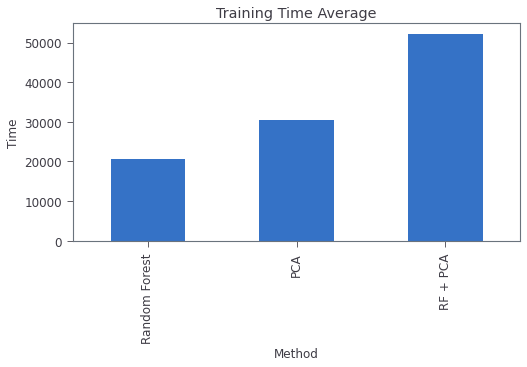

In [139]:
ax = combined.mean().plot(kind='bar', title ="Training Time Average", figsize=(8, 4), legend=False, fontsize=12)
ax.set_xlabel("Method", fontsize=12)
ax.set_ylabel("Time", fontsize=12)
plt.show()

## K-Means

In [140]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

Training Data: (60000, 28, 28)
Training Labels: (60000,)


In [141]:
print('Testing Data: {}'.format(x_test.shape))
print('Testing Labels: {}'.format(y_test.shape))

Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


In [142]:
import matplotlib.pyplot as plt

%matplotlib inline

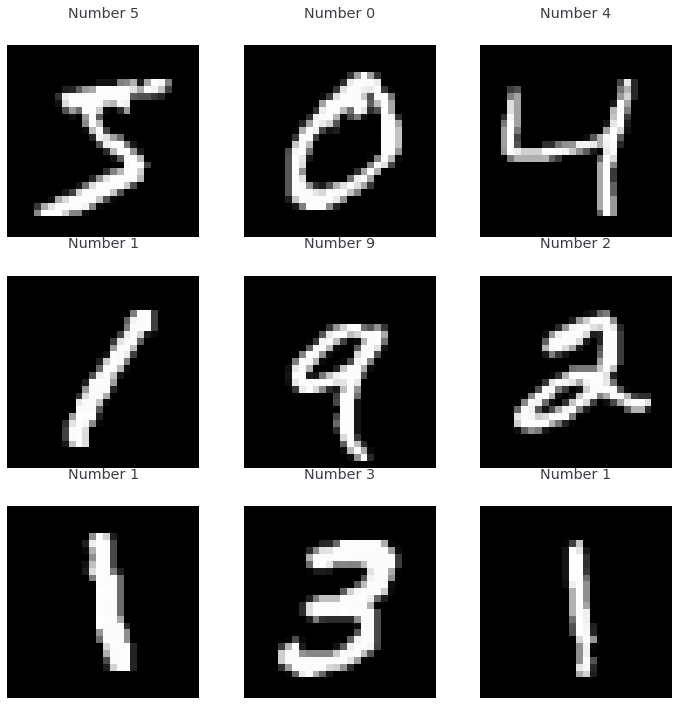

In [143]:
# create figure with 3x3 subplots using matplotlib.pyplot

fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
    
fig.show()

In [144]:
# preprocessing the images

# convert each image to 1 dimensional array
X = x_train.reshape(len(x_train),-1)
Y = y_train

# normalize the data to 0 - 1
X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

(60000, 784)
(784,)


In [145]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_test))
print(n_digits)

# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits)

# Fit the model to the training data
kmeans.fit(X)

10


MiniBatchKMeans(n_clusters=10)

In [146]:
kmeans.labels_

array([2, 5, 8, ..., 7, 4, 7], dtype=int32)

In [147]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [151]:
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)

In [152]:
from sklearn import metrics

def calculate_metrics(estimator, data, labels):

    # Calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [153]:
clusters = [10, 16, 36, 64, 144, 256]

# test different numbers of clusters
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    
    # print cluster metrics
    calculate_metrics(estimator, X, Y)
    
    # determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # calculate and print accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))

Number of Clusters: 10
Inertia: 2387985.3591841217
Homogeneity: 0.48082493198258275
Accuracy: 0.5648666666666666

Number of Clusters: 16
Inertia: 2208793.591212579
Homogeneity: 0.5403872188041218
Accuracy: 0.6402333333333333

Number of Clusters: 36
Inertia: 2068110.9151334458
Homogeneity: 0.625230116704462
Accuracy: 0.7016666666666667

Number of Clusters: 64
Inertia: 1816867.3193980441
Homogeneity: 0.7450417227715772
Accuracy: 0.8196166666666667

Number of Clusters: 144
Inertia: 1630495.818824551
Homogeneity: 0.8033501864476583
Accuracy: 0.8595

Number of Clusters: 256
Inertia: 1514340.8726559998
Homogeneity: 0.8377839365781025
Accuracy: 0.8893833333333333



In [154]:
X_test = x_test.reshape(len(x_test),-1)
X_test = X_test.astype(float) / 255.

kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, Y)

test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(kmeans.predict(X_test), cluster_labels)
    
print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))

Accuracy: 0.8944



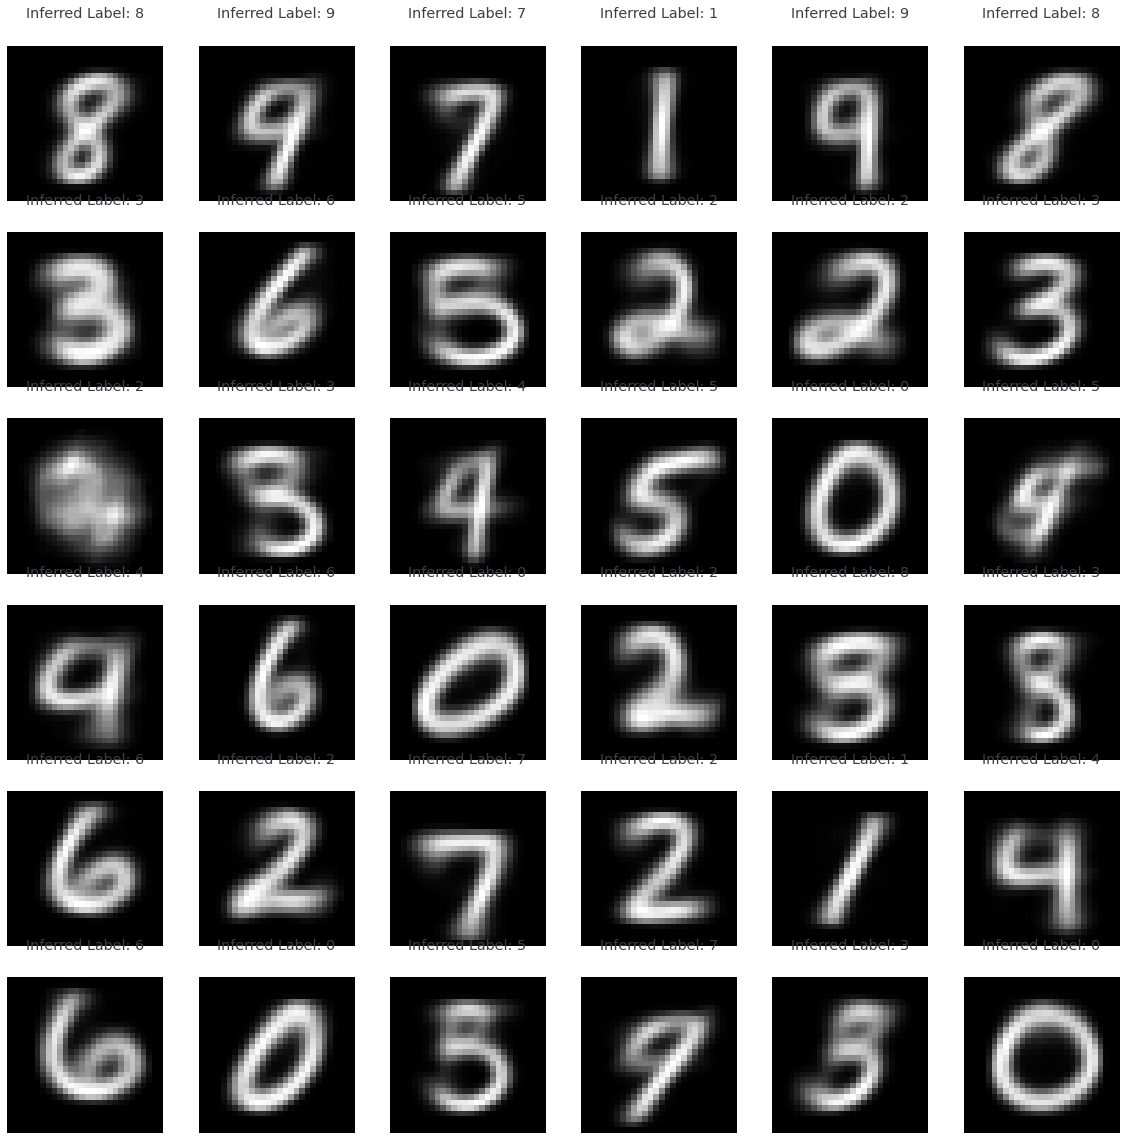

In [155]:
kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)

centroids = kmeans.cluster_centers_

images = centroids.reshape(36, 28, 28)
images *= 255
images = images.astype(np.uint8)

cluster_labels = infer_cluster_labels(kmeans, Y)

fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()

for i, ax in enumerate(axs.flat):
    
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))
    
    
    ax.matshow(images[i])
    ax.axis('off')
    
fig.show()
